In [1]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd

In [2]:
def get_csv_hist(path):
    df = pd.read_csv(path, sep=';')
    return df.to_dict(orient='list')

In [3]:
# get_csv_hist(histpaths[-1])

In [4]:
import os
dirpath = '../mimic3models/phenotyping/keras_logs'
histpaths = os.listdir(dirpath)
namestart = len('k_lstm.n256.d0.3.dep1.bs8.ts1.0PHE_')
names = [histpath[namestart:-5] for histpath in histpaths]
histpaths = [os.path.join(dirpath,histpath) for histpath in histpaths]

In [5]:
names

['doc2vec_structured_condensed',
 'doc2vec',
 'words',
 'doc2vec_structured',
 'structured_condensed',
 'structured',
 'cuis']

In [6]:
# histpaths = ['cuis_phe_history.pk', 'words_phe_history.pk','./all_logs/PHE_COMBINED_CONDENSED_BESTMCC.csv', './all_logs/PHE_STRUCTURED_CONDENSED_BESTMCC.csv','./all_logs/PHE_STRUCT_BSLN.csv','./all_logs/PHE_D2V_WEIGHTED_BESTMCC.csv']
# names = ['Bag of CUIs PHE', 'Bag of Words PHE', 'condensed', 'structured condensed',  'original baseline', 'just d2v']
histories = [] 
for i,path in enumerate(histpaths):
    if 'pk' in path:
        with open(path, 'rb') as pkfile:
            hst = pickle.load(pkfile)
            hst['name'] = names[i]
            histories.append(hst)
    if 'csv' in path:
        hst = get_csv_hist(path)
        hst['name'] = names[i]
        histories.append(hst)

In [7]:
# from matplotlib import gridspec

# fig2 = plt.figure(constrained_layout=True)
# spec2 = gridspec.GridSpec(ncols=2, nrows=2, figure=fig2)
# f2_ax1 = fig2.add_subplot(spec2[0, 0])
# f2_ax2 = fig2.add_subplot(spec2[0, 1])
# f2_ax3 = fig2.add_subplot(spec2[1, 0])
# f2_ax4 = fig2.add_subplot(spec2[1, 1])

In [8]:
import seaborn as sns
linestyles = ['solid', 'dashed', 'dashdot', 'dotted']
def plot_multiple(metrics, histories):
    pal = sns.color_palette("colorblind", len(histories))

    for i,history in enumerate(histories):
        epochs = history['epoch']
        for j,metric in enumerate(metrics):
            values = history[metric]
            val_values = history[metric]
#             plt.plot(epochs, values, 'bo', label=history['name']+' Training '+metric, color = pal[i])
            plt.plot(epochs, val_values, 'b', label=history['name']+' '+metric, color = pal[i], linestyle = linestyles[j])

    plt.title('Phenotyping '+', '.join(metrics))
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.savefig('phe'+metrics[0]+'.pdf',bbox_inches='tight')
    plt.show()


In [9]:
# for i, history in enumerate(histories):
#     print(i)
#     history['val_ave_mcc']
histories[2].keys()

dict_keys(['epoch', 'loss', 'train_auc_scores', 'train_ave_auc_macro', 'train_ave_auc_micro', 'train_ave_auc_weighted', 'train_ave_mcc', 'train_ave_precision_weighted', 'val_auc_scores', 'val_ave_auc_macro', 'val_ave_auc_micro', 'val_ave_auc_weighted', 'val_ave_mcc', 'val_ave_precision_weighted', 'val_loss', 'name'])

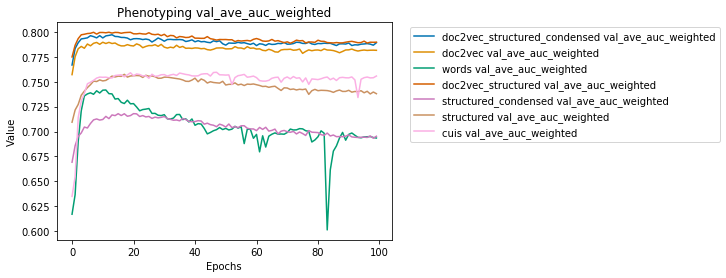

In [39]:
fig = plt.figure()
plot_multiple(['val_ave_auc_weighted'],histories)

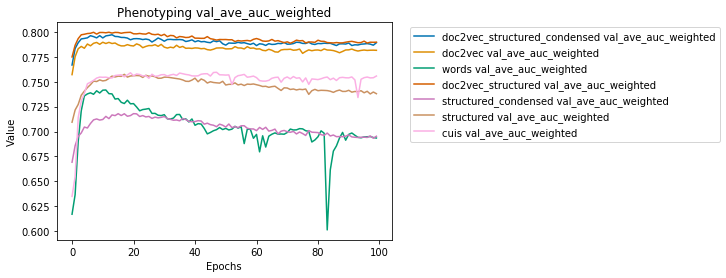

In [11]:
fig = plt.figure()
plot_multiple(['val_ave_auc_weighted'],histories)


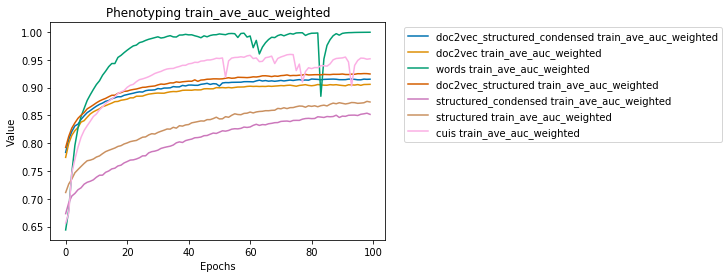

In [12]:
fig = plt.figure()
plot_multiple(['train_ave_auc_weighted'],histories)


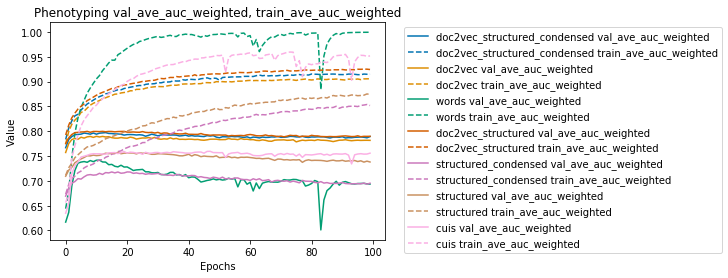

In [13]:
plot_multiple(['val_ave_auc_weighted','train_ave_auc_weighted' ],histories)

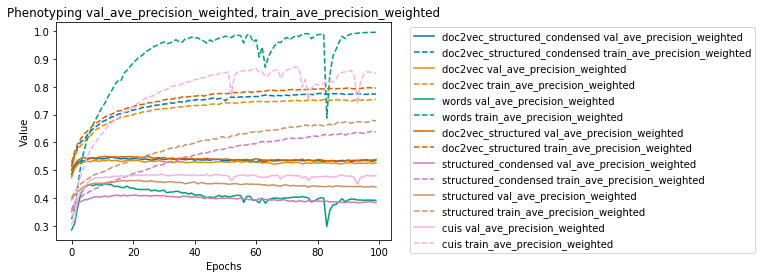

In [14]:

plot_multiple(['val_ave_precision_weighted', 'train_ave_precision_weighted'],histories)
# histories[0].keys()


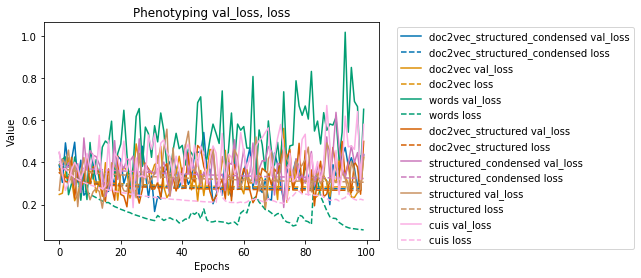

In [15]:
plot_multiple(['val_loss', 'loss'],histories)

In [16]:
import yaml
phenotypes_dict = yaml.load(open('resources/hcup_ccs_2015_definitions.yaml','r'))

/data/moldwinar/miniconda/envs/tf2/lib/python3.7/site-packages/ipykernel_launcher.py:2: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  


In [17]:
# phenotypes_dict

In [18]:
phe_list = [k for k,v in phenotypes_dict.items() if v['use_in_benchmark']==True ]

In [19]:
import pandas as pd
from resources import metrics
def getcsvmetrics(paths, names):
    aucs_by_phenotype = []
    other_metrics = []
    for i,path in enumerate(paths):
        print(names[i])
        df = pd.read_csv(path)
        predictions = df.apply(lambda row: row.iloc[2:27], axis = 1)
        y_true = df.apply(lambda row: row.iloc[27:], axis = 1)
        metrics_dict =  metrics.print_metrics_multilabel(y_true, predictions, verbose=0)
        aucs_by_phenotype.append(metrics_dict['auc_scores'])
        metric_values = [item for i,item in enumerate(metrics_dict.values())  if i != 1]
        other_metrics.append(metric_values)
    metric_names = [item for i,item in enumerate(metrics_dict.keys())  if i != 1]
    pd.DataFrame(other_metrics, index=names, columns =metric_names ).to_csv('Charts/PHE_metrics_chart.csv')
    return pd.DataFrame(aucs_by_phenotype, columns = phe_list, index = names)
#     return df

In [20]:
def getcsvmetrics_test(paths, names):
    aucs_by_phenotype = []
    other_metrics = []
    for i,path in enumerate(paths):
        print(names[i])
        df = pd.read_csv(path)
        predictions = df.apply(lambda row: row.iloc[2:27], axis = 1)
        y_true = df.apply(lambda row: row.iloc[27:], axis = 1)
        metrics_dict =  metrics.print_metrics_multilabel(y_true, predictions, verbose=0)
        aucs_by_phenotype.append(metrics_dict['auc_scores'])
        metric_values = [item for i,item in enumerate(metrics_dict.values())  if i != 1]
        other_metrics.append(metric_values)
    metric_names = [item for i,item in enumerate(metrics_dict.keys())  if i != 1]
    pd.DataFrame(other_metrics, index=names, columns =metric_names ).to_csv('Charts/PHE_metrics_chart.csv')
    return pd.DataFrame(aucs_by_phenotype, columns = phe_list, index = names)
#     return df

In [21]:
# auc_chart = getcsvmetrics(histpaths, names)
testdir = '../mimic3models/phenotyping/test_predictions/'
testpaths = [testdir + x for x in os.listdir('../mimic3models/phenotyping/test_predictions')]
auc_chart = getcsvmetrics_test(testpaths, names)
testpaths

doc2vec_structured_condensed
doc2vec


/data/moldwinar/miniconda/envs/tf2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/data/moldwinar/miniconda/envs/tf2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


words
doc2vec_structured


/data/moldwinar/miniconda/envs/tf2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/data/moldwinar/miniconda/envs/tf2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


structured_condensed
structured


/data/moldwinar/miniconda/envs/tf2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/data/moldwinar/miniconda/envs/tf2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


cuis


['../mimic3models/phenotyping/test_predictions/k_lstm.n256.d0.3.dep1.bs8.ts1.0PHE_structured_.statePHE_structured_.csv',
 '../mimic3models/phenotyping/test_predictions/k_lstm.n256.d0.3.dep1.bs8.ts1.0PHE_structured_condensed_.statePHE_structured_condensed_.csv',
 '../mimic3models/phenotyping/test_predictions/k_lstm.n256.d0.3.dep1.bs8.ts1.0PHE_doc2vec_structured_.statePHE_doc2vec_structured_.csv',
 '../mimic3models/phenotyping/test_predictions/k_lstm.n256.d0.3.dep1.bs8.ts1.0PHE_doc2vec_.statePHE_doc2vec_.csv',
 '../mimic3models/phenotyping/test_predictions/k_lstm.n256.d0.3.dep1.bs8.ts1.0PHE_doc2vec_structured_condensed_.statePHE_doc2vec_structured_condensed_.csv',
 '../mimic3models/phenotyping/test_predictions/k_lstm.n256.d0.3.dep1.bs8.ts1.0PHE_words_.statePHE_words_.csv',
 '../mimic3models/phenotyping/test_predictions/k_lstm.n256.d0.3.dep1.bs8.ts1.0PHE_cuis_.statePHE_cuis_.csv']

In [22]:
auc_chart.to_csv('Charts/phe_auc_chart.csv')

In [23]:
# pd.read_csv('Charts/PHE_metrics_chart.csv')
auc_chart

,Septicemia (except in labor),Diabetes mellitus without complication,Diabetes mellitus with complications,Disorders of lipid metabolism,Fluid and electrolyte disorders,Essential hypertension,Hypertension with complications and secondary hypertension,Acute myocardial infarction,Coronary atherosclerosis and other heart disease,Conduction disorders,...,Pleurisy; pneumothorax; pulmonary collapse,Respiratory failure; insufficiency; arrest (adult),Other lower respiratory disease,Other upper respiratory disease,Other liver diseases,Gastrointestinal hemorrhage,Acute and unspecified renal failure,Chronic kidney disease,Complications of surgical procedures or medical care,Shock
doc2vec_structured_condensed,0.788087,0.903235,0.750510,0.679626,0.736327,0.657088,0.707128,0.710307,0.730583,0.779430,...,0.731707,0.702830,0.753385,0.661158,0.749362,0.676667,0.798289,0.890231,0.842104,0.872420
doc2vec,0.753383,0.807730,0.691759,0.639841,0.693255,0.656259,0.665300,0.680117,0.682824,0.738842,...,0.674071,0.656925,0.736617,0.667504,0.720743,0.659360,0.772741,0.864394,0.792902,0.820705
words,0.835032,0.945697,0.880034,0.756517,0.812351,0.737800,0.738412,0.817776,0.816670,0.862200,...,0.880995,0.807634,0.838251,0.691749,0.817477,0.720852,0.843391,0.906593,0.895213,0.891439
doc2vec_structured,0.821365,0.945780,0.883040,0.761880,0.814483,0.735038,0.732660,0.809080,0.811820,0.860185,...,0.878045,0.799543,0.834806,0.698955,0.818829,0.714090,0.842846,0.899256,0.876532,0.881085
structured_condensed,0.830937,0.928843,0.877695,0.763485,0.810714,0.727425,0.739053,0.815725,0.809708,0.860350,...,0.873042,0.795591,0.845903,0.705913,0.819584,0.718345,0.847641,0.904170,0.887144,0.890791
structured,0.785002,0.870474,0.792007,0.685932,0.766931,0.669740,0.637595,0.722587,0.789595,0.847172,...,0.742107,0.743035,0.787205,0.635233,0.738336,0.660899,0.781380,0.869785,0.839590,0.813023
cuis,0.803174,0.864855,0.848862,0.728330,0.793613,0.683990,0.669311,0.749135,0.796683,0.850818,...,0.787623,0.799235,0.799949,0.658552,0.769320,0.671812,0.803188,0.876561,0.869957,0.869567


In [24]:
import seaborn as sns
linestyles = ['solid', 'dashed', 'dashdot', 'dotted']
pal = sns.color_palette("colorblind", len(auc_chart))

0
10
20


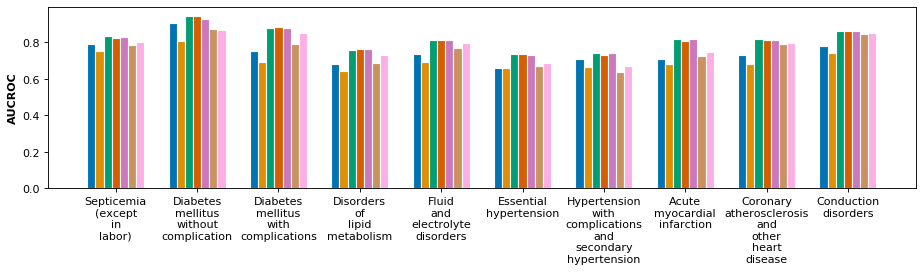

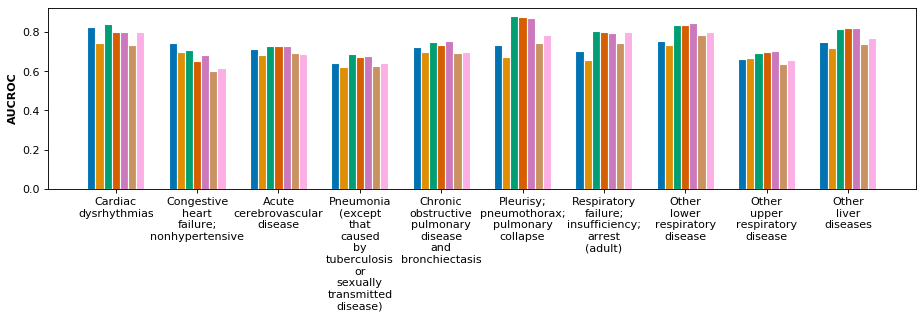

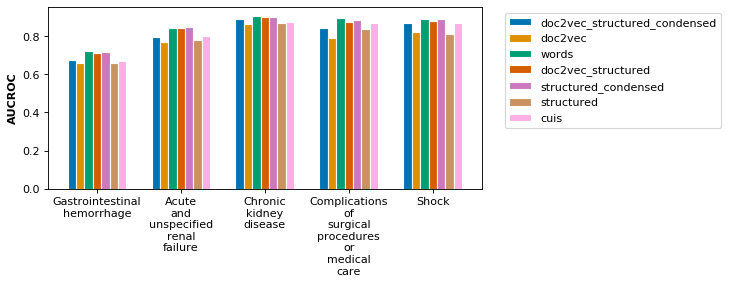

In [38]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
# plt.figure(num=None, figsize=(25, 3), dpi=80, facecolor='w', edgecolor='k')
# set width of bar
for colnum in range(0,25,10):
    width=14
    if colnum==20:
        width=7
    
    plt.figure(num=None,figsize=(width, 3), dpi=80, facecolor='w', edgecolor='k')

    print(colnum)
    
    auc_chart_slice = auc_chart[auc_chart.columns[colnum:min(colnum+10, len(auc_chart.columns))]]
    barWidth = 0.1
    names = list(auc_chart_slice.index)
    bars=auc_chart_slice.values.tolist()[0:]
    # set height of bar

    # Set position of bar on X axis
    r1 = np.arange(len(bars[0]))
    rs = [r1]
    for i in range(0,len(bars)-1):
        rs.append([x + barWidth for x in rs[i] ])

    # Make the plot
    for i in range(len(rs)):
        plt.bar(rs[i], bars[i], color=pal[i], width=barWidth, edgecolor='white', label=names[i])

    # Add xticks on the middle of the group bars
#     plt.xlabel('phenotype', fontweight='bold')
    plt.ylabel('AUCROC', fontweight='bold')
    plt.xticks([r + (0.5*len(testpaths[:-1]))*barWidth for r in range(len(bars[0]))], [x.replace(' ', '\n') for x in list(auc_chart_slice.columns)])
    if colnum==20:
        plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.savefig('phe_bar_auc'+str(colnum/5)+'.pdf',bbox_inches='tight')

# Create legend & Show graphic
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

plt.show()
